## **Description du corpus**
- Nombre de sites distincts qui ont été aspirés
- Nombre de documents aspirés / Nombre moyen de documents par site, minimum, maximum
- Nombre de types/tokens / Nombre moyen de types/tokens par site, minimum, maximum

*Nombre de sites distincts*  
Pour chaque acteur, ouvrir les CSV contenanant la liste des URLs et compter le unique de noms de domaines;  
Pour ce faire, splitter l'URL et retenir le nom de domaine 

#### **Acteurs du système de santé dont les sites Web nous intéressent pour la constitution du corpus**

In [1]:
from pandas import *
from pathlib import Path
import os, re, shutil, nltk

path = '/Users/camilledemers/Documents/03-corpus/2-data/1-fr/'

os.chdir(path)

nb = len([file for file in os.listdir() if file.endswith('csv') and not 'chum' in file]) # (le chum se trouve déjà dans chu_iu)
print('Les sites Web de {} acteurs ont été aspirés pour constituer notre corpus :'.format(nb))
for file in os.listdir():
    if file.endswith('csv') and not 'chum' in file:
        print(file[:-4])

Les sites Web de 16 acteurs ont été aspirés pour constituer notre corpus :
cliniques_medicales
msss
gmf
inesss
quebec_sante
ramq
chsld
urgence_sante
chu_iu
asso_ordres
inspq
mf
cisss_ciusss
csbe
sante_mtl
ophq


#### **Nombre de sites aspirés**

In [3]:
nb_domaines = 0
domaines = []

for file in os.listdir():
    if file.endswith('csv') and not 'chum' in file:
        # encoding= 'ISO-8859-1' "utf-8"
        # sep = ';' ','
        try:
            with open(path + file, encoding = 'ISO-8859-1') as f:
                csv = read_csv(f, sep=';')

        except: 
            try: 
                with open(path + file, encoding = 'ISO-8859-1') as f:
                    csv = read_csv(f, sep=',')
            
            except: 
                try:
                    with open(path + file, encoding = 'utf-8') as f:
                        csv = read_csv(f, sep= ',')

                except: 
                    try:
                        with open(path + file, encoding = 'utf-8') as f:
                            csv = read_csv(f, sep= ';')

                    except Exception as e:
                        print(file + '-' + str(e))

        urls = csv['url'].tolist()
        regex = 'https?://(www)?1?\.?(\w+)'
        try:
            domaines += [re.match(regex, url).group(2) for url in urls]
        except Exception as e:
            True
            #print(file + '-' + str(e))

In [4]:
domaines += ['ramq', 'sante_mtl', 'urgence_sante']
domaines = set(domaines)
nb_domaines = len(domaines) + 22 # (cisss/ciusss)

In [5]:
print('{} sites distincts ont été aspirés au total'.format(nb_domaines))

182 sites distincts ont été aspirés au total


#### **Nombre de documents** (fr)
#### **Nombre de types / tokens** (fr)

In [60]:
from nltk.tokenize import RegexpTokenizer
# Seulement les caractères alphabétiques
tokenizer_re = RegexpTokenizer(r"\w\'|\w+")

# En français 
path = '/Users/camilledemers/Documents/03-corpus/2-data/1-fr/'

os.chdir(path)

nb_docs_fr = 0
corpus = []
fichiers = [f for f in os.listdir() if f.endswith('.csv') and not (f == 'mf.csv') and not (f == 'chum.csv')]
print('Voici le nombre de documents (HTML ou PDF) aspirés pour chacun des ' + str(len(fichiers)) + ' acteurs considérés.\n(Noter que le chum devrait se trouver sous CHU_IU)')

for file in fichiers:
    nb_tokens = 0
    nb_types = set()
    with open(path + file) as f:
        data = read_csv(f)['text'].tolist()
        nb_doc = len(data)
        subcorpus = [re.sub('\d', '', t.strip('\n').lower().replace('’', '\'').replace('  ', ' ')) for t in data]
        corpus.append(subcorpus)
        tokens = nltk.flatten([tokenizer_re.tokenize(doc) for doc in subcorpus])
        types = set(tokens)

        print(file + '\t' + str(nb_doc) + ' documents\t' + str(len(tokens)) + ' tokens\t' + str(len(types)) +' formes uniques')

        nb_docs_fr += nb_doc

print('\nAu total, notre corpus francophone compte donc un total de {} documents.'.format(nb_docs_fr)+'\nOn a donc un une moyenne d\'environ {} documents par site (mais ça varie considérablement d\'un site à l\'autre).'.format(round(nb_docs_fr/157)))


Voici le nombre de documents (HTML ou PDF) aspirés pour chacun des 15 acteurs considérés.
(Noter que le chum devrait se trouver sous CHU_IU)
cliniques_medicales.csv	529 documents	777886 tokens	8779 formes uniques
msss.csv	9745 documents	15896790 tokens	209692 formes uniques
gmf.csv	1912 documents	951162 tokens	15769 formes uniques
inesss.csv	1817 documents	3235449 tokens	19713 formes uniques
quebec_sante.csv	240 documents	215186 tokens	8982 formes uniques
ramq.csv	4633 documents	92903404 tokens	26414 formes uniques
chsld.csv	1001 documents	1249922 tokens	34491 formes uniques
urgence_sante.csv	342 documents	225202 tokens	7384 formes uniques
chu_iu.csv	6697 documents	8942356 tokens	124214 formes uniques
asso_ordres.csv	34592 documents	36261968 tokens	87953 formes uniques
inspq.csv	4339 documents	38692872 tokens	56891 formes uniques
cisss_ciusss.csv	35374 documents	63638410 tokens	532295 formes uniques
csbe.csv	421 documents	134536 tokens	4476 formes uniques
sante_mtl.csv	5256 documents	3

#### **Déterminer la taille d'échantillon à retenir**

In [61]:
x = []
for i in range(12): # On va aller jusqu'à max 115 000 documents (on en a 115 080)
    a = 10000
    x.append(a * i)

In [62]:
corpus = nltk.flatten(corpus)

In [63]:
len(corpus)

109969

In [64]:
import random
random.shuffle(corpus)

y = []
types = set()

for valeur in x:
    if (len(corpus) > valeur):
        tokens = nltk.flatten([tokenizer_re.tokenize(doc) for doc in corpus[:valeur]])
        tokens =  set(tokens)
        types.update(tokens)
        y.append(len(types))
        print("Nombre de documents considérés : " + str(valeur) + " - " + str(len(types)) + " formes uniques.")

Nombre de documents considérés : 0 - 0 formes uniques.
Nombre de documents considérés : 10000 - 165469 formes uniques.
Nombre de documents considérés : 20000 - 251668 formes uniques.
Nombre de documents considérés : 30000 - 323033 formes uniques.
Nombre de documents considérés : 40000 - 396804 formes uniques.
Nombre de documents considérés : 50000 - 460527 formes uniques.
Nombre de documents considérés : 60000 - 512514 formes uniques.
Nombre de documents considérés : 70000 - 566624 formes uniques.
Nombre de documents considérés : 80000 - 618328 formes uniques.
Nombre de documents considérés : 90000 - 672823 formes uniques.
Nombre de documents considérés : 100000 - 717838 formes uniques.


In [65]:
y

[0,
 165469,
 251668,
 323033,
 396804,
 460527,
 512514,
 566624,
 618328,
 672823,
 717838]

In [66]:
x = x[:-1]

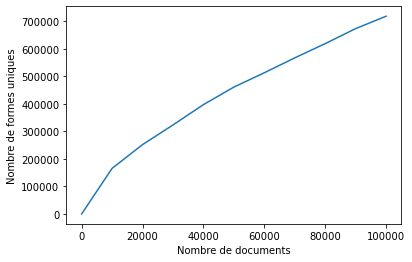

In [67]:
# Refaire en randomisant l'ordre des documents

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('Nombre de documents')
plt.ylabel('Nombre de formes uniques')
plt.show()